In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist    # Keras importa la base de datos MNIST
from keras.models import Sequential # Sequential sirve para declarar modelos neuronales
from keras.layers.core import Dense, Dropout, Activation # Funciones para declarar capas neuronales específicas 
from keras.utils import np_utils    # np_utils sirve para crear los vectores objetivo
from keras import optimizers
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


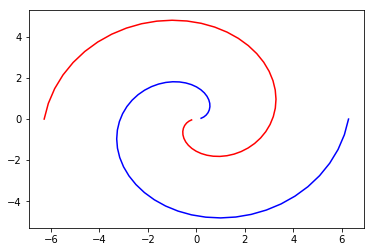

In [2]:
Npoints = 50
theta = np.linspace(0.2,2*np.pi,Npoints)
rho = theta
x1 = rho*np.cos(theta)
x2 = rho*np.sin(theta)

y1 = rho*np.cos(theta+np.pi)
y2 = rho*np.sin(theta+np.pi)

plt.plot(x1,x2,'b',y1,y2,'r')
plt.show()

Xblue = np.vstack((x1,x2)).T
Xred = np.vstack((y1,y2)).T
X = np.vstack((Xblue,Xred))

yblue = np.ones(Npoints)
yred = np.zeros(Npoints)
Y = np.hstack((yblue,yred))


In [14]:
# Es sensible al valor inicial

tlp = Sequential()
tlp.add(Dense(3, use_bias=True, activation='tanh', input_shape=(2,)))
tlp.add(Dense(2, use_bias=True, activation='tanh'))
tlp.add(Dense(1, use_bias=True, activation='sigmoid'))

model = tlp
adam = optimizers.Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
h = model.fit(X, Y, batch_size=1000, epochs=1000, verbose=1, validation_split=0.0, shuffle=True)


Epoch 1/1000
100/100 [==============================] - 0s - loss: 0.6921 - acc: 0.5000
Epoch 2/1000
100/100 [==============================] - 0s - loss: 0.6800 - acc: 0.5200
Epoch 3/1000
100/100 [==============================] - 0s - loss: 0.6710 - acc: 0.4900
Epoch 4/1000
100/100 [==============================] - 0s - loss: 0.6686 - acc: 0.5400
Epoch 5/1000
100/100 [==============================] - 0s - loss: 0.6669 - acc: 0.5900
Epoch 6/1000
100/100 [==============================] - 0s - loss: 0.6626 - acc: 0.5600
Epoch 7/1000
100/100 [==============================] - 0s - loss: 0.6550 - acc: 0.5800
Epoch 8/1000
100/100 [==============================] - 0s - loss: 0.6438 - acc: 0.6200
Epoch 9/1000
100/100 [==============================] - 0s - loss: 0.6332 - acc: 0.6500
Epoch 10/1000
100/100 [==============================] - 0s - loss: 0.6260 - acc: 0.6400
Epoch 11/1000
100/100 [==============================] - 0s - loss: 0.6118 - acc: 0.6600
Epoch 12/1000
100/100 [=======

In [15]:
hlayer = Sequential()
hlayer.add(Dense(3, use_bias=True, activation='tanh', input_shape=(2,), weights=model.layers[0].get_weights()))
hlayer.add(Dense(2, use_bias=True, activation='tanh', weights=model.layers[1].get_weights()))

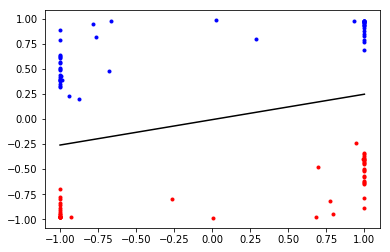

In [16]:
# Datos de entrenamientos transformados por la capa oculta y el hiperplano de la neurona de salida

xx = np.linspace(-1,1,100)
w2 = model.layers[2].get_weights()[0]
b2 = model.layers[2].get_weights()[1]
plt.plot(xx,(-w2[0][0]*xx - b2[0])/w2[1][0],'k')

y = hlayer.predict(X)
plt.plot(y[0:Npoints,0],y[0:Npoints,1],'b.',y[Npoints+1:,0],y[Npoints+1:,1],'r.')
plt.show()




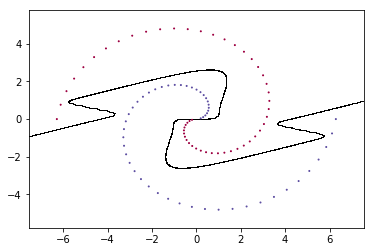

In [17]:
# Frontera de Decisión en el espacio de los datos de entrenamiento

def plot_decision_boundary(pred_func, X, Y, npts = 50):
    xmin, xmax = X[:, 0].min(), X[:, 0].max()
    ymin, ymax = X[:, 1].min(), X[:, 1].max()
    dx, dy = (xmax - xmin)*0.1, (ymax - ymin)*0.1
    xx, yy = np.meshgrid(np.linspace(xmin-dx, xmax+dx, npts), np.linspace(ymin-dy, ymax+dy, npts))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, colors='k', levels=[0.48, 0.52])
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral, s=1)

plot_decision_boundary(lambda x: model.predict(x), X, Y, 100) 
plt.show()

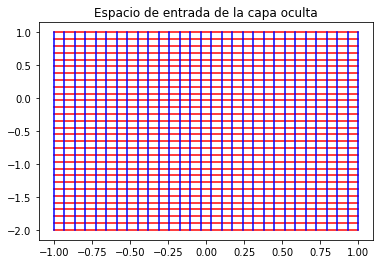

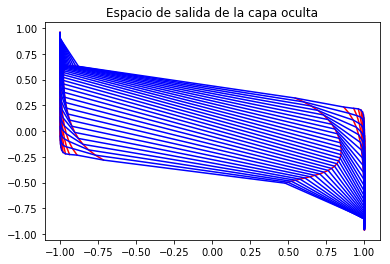

In [20]:
# Entendiendo la transformación de la capa oculta

no = 30
x = np.linspace(-1,1,no)
y = np.linspace(-2,1,no)


for i in range(x.shape[0]):
    xo = x
    yo = y[i]*np.ones(no)
    yh = hlayer.predict(np.vstack((xo,yo)).T)
    
    plt.figure(1)
    plt.plot(xo,yo,'r') 
    plt.figure(2)
    plt.plot(yh[:,0],yh[:,1],'r')
    
for j in range(y.shape[0]):
    xo = x[j]*np.ones(no)
    yo = y
    yh = hlayer.predict(np.vstack((xo,yo)).T)
    
    plt.figure(1)
    plt.plot(xo,yo,'b') 
    plt.figure(2)
    plt.plot(yh[:,0],yh[:,1],'b') 
    
plt.figure(1)
plt.title('Espacio de entrada de la capa oculta')
plt.figure(2)
plt.title('Espacio de salida de la capa oculta')
plt.show()